In [8]:
import numpy as np
import keras
from keras.models import Model, save_model, load_model
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D

## data
import pickle

data_batch_1 = pickle.load(open("cifar-10-batches-py/data_batch_1", 'rb'), encoding='bytes')
data_batch_2 = pickle.load(open("cifar-10-batches-py/data_batch_2", 'rb'), encoding='bytes')
data_batch_3 = pickle.load(open("cifar-10-batches-py/data_batch_3", 'rb'), encoding='bytes')
data_batch_4 = pickle.load(open("cifar-10-batches-py/data_batch_4", 'rb'), encoding='bytes')
data_batch_5 = pickle.load(open("cifar-10-batches-py/data_batch_5", 'rb'), encoding='bytes')

train_X_1 = data_batch_1[b'data']
train_X_1 = train_X_1.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
train_Y_1 = data_batch_1[b'labels']

train_X_2 = data_batch_2[b'data']
train_X_2 = train_X_2.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
train_Y_2 = data_batch_2[b'labels']

train_X_3 = data_batch_3[b'data']
train_X_3 = train_X_3.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
train_Y_3 = data_batch_3[b'labels']

train_X_4 = data_batch_4[b'data']
train_X_4 = train_X_4.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
train_Y_4 = data_batch_4[b'labels']

train_X_5 = data_batch_5[b'data']
train_X_5 = train_X_5.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
train_Y_5 = data_batch_5[b'labels']

train_X = np.row_stack((train_X_1, train_X_2))
train_X = np.row_stack((train_X, train_X_3))
train_X = np.row_stack((train_X, train_X_4))
train_X = np.row_stack((train_X, train_X_5))

train_Y = np.row_stack((train_Y_1, train_Y_2))
train_Y = np.row_stack((train_Y, train_Y_3))
train_Y = np.row_stack((train_Y, train_Y_4))
train_Y = np.row_stack((train_Y, train_Y_5))
train_Y = train_Y.reshape(50000, 1).transpose(0, 1).astype("int32")
train_Y = keras.utils.to_categorical(train_Y)

test_batch = pickle.load(open("cifar-10-batches-py/test_batch", 'rb'), encoding='bytes')
test_X = test_batch[b'data']
test_X = test_X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
test_Y = test_batch[b'labels']
test_Y = keras.utils.to_categorical(test_Y)

train_X /= 255
test_X /= 255

## model
inpt = Input(shape=(32,32,3))
x = Conv2D(64, (3, 3), padding='same', activation='relu')(inpt)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = Dropout(0.1)(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = AveragePooling2D(pool_size=(2, 2), strides=2)(x)
x = Dropout(0.1)(x)

x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization(axis=3)(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)

x = Dense(10, activation='softmax')(x)

model = Model(inpt, x) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

for ii in range(10):
    print("Epoch:", ii+1)
    model.fit(train_X, train_Y, batch_size=100, epochs=1, verbose=1)
    score = model.evaluate(test_X, test_Y, verbose=1)
    print('Test loss =', score[0])
    print('Test accuracy =', score[1])

save_model(model,'cifar10.h5')
model = load_model('cifar10.h5')

pred_Y = model.predict(test_X)
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss =', score[0])
print('Test accuracy =', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

KeyboardInterrupt: 

In [91]:
import numpy as np
import keras
from keras.models import Model, save_model, load_model
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
import tensorflow as tf
## data
import pickle


for myimport in  np,keras,tf:
    print(myimport.__name__,myimport.__version__)

numpy 1.16.4
keras 2.1.6
tensorflow 1.3.0


In [ ]:
for module in mpl, np, pd, sklearn, tf, keras:\n",
    "    print(module.__name__, module.__version__)\n"

In [14]:
for module in  np,   tf, keras:
       print(module.__name__, module.__version__)

numpy 1.16.4
tensorflow 1.3.0
keras 2.1.6


In [19]:
import pickle

data_batch_1 = pickle.load(open("cifar-10-batches-py/data_batch_1", 'rb'), encoding='bytes')

train_X_1 = data_batch_1[b'data']


In [ ]:
train_X_1 = train_X_1.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
train_Y_1 = data_batch_1[b'labels']

In [24]:
type (data_batch_1)

dict

In [33]:
train_X_1.shape

(10000, 3072)

In [35]:
train_X_1[0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [36]:
x=train_X_1[0]

In [37]:
x.tostring()

b';+2Dbw\x8b\x91\x95\x95\x83}\x8e\x90\x89\x81\x89\x86|\x8b\x8b\x85\x88\x8b\x98\xa3\xa8\x9f\x9e\x9e\x98\x94\x10\x00\x123Xx\x80\x7f~tjeiqmpwmi}\x7fz\x83|y\x83\x84\x85\x85{wz\x19\x101Sn\x81\x82yqppji\x80|\x82\x7fzsx\x82\x83\x8b\x7f~\x7f\x82\x8e\x82vxm!&Wjsuriky}mq\x92\x85\x7fvu\x7fz\x84\x89\x88\x83|\x82\x84\x87\x82}y^2;f\x7f|yxrk}\x81jl|ylbnux\x86\x8c\x83\x8d\x87\x7fywgWKCGTn\x81\x88\x83\x81wlz{ikolb^aSXfaXv\x8c\x88xkXC# ao{\x82\x88\x84zy\x7f\x8a|xkPDJeiA:?N\x88z\x8b\x97\x81l_`YBsw\x82\x8c\x85\x7f\x8a\x89\x83\x85\x86lH3)H\xb5\xd1}D@R{p\x87\x97\x89rie~f\x89\x80\x84\x80w{\x80\x82y\x89\x83J62,V\xcb\xd9\xa2dMKJLk\x87\x87\x81\x7fw}\x86\x9a\x9a\x9c\x8c{}~\x7f\x85\x84Z?>FOg\x98\x94\x8dye`VKe\x88\x88\x86\x85\x84\x80\x85\x9a\x9b\x9c\x93\x85\x89\x8b\x86\x8dyPaZb\x89\x8b\x94\x86\x8a\x86\x8c\xaf\x8efl\x87\x83\x85\x8a\x88\x82\x86\x91\x92\x92\x87\x7f\x81ug\x82xo\x92\x88\xa3\xa9\x98\xa1\x94\xb1\xa1\xc3\xd1\xbd}l\x8c\x89\x84\x88\x85\x84\x85\x8e\x8d\x8c\x90\x93yTXme\x8a\xd5\xb2\xbf\xd3\xbd\xcd\xcf\xd5\xbf

In [38]:
from PIL import Image

In [46]:
import pickle
import random
import matplotlib.pyplot as plt
from PIL import Image
images_batch = np.array(train_X_1)
print(images_batch.shape)
images = images_batch.reshape([-1, 3, 32, 32])
print(images.shape)
        

(10000, 3072)
(10000, 3, 32, 32)


(32, 32, 3)


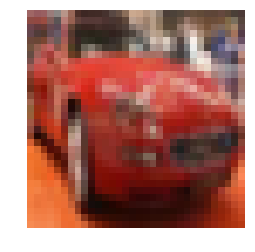

In [59]:
imgs = images[5, :, :, :].reshape([3, 32, 32])
img = np.stack((imgs[0, :, :], imgs[1, :, :], imgs[2, :, :]), 2)

print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [48]:
t=images[5]

In [61]:
type(img)

numpy.ndarray

In [87]:
vv=Image.fromarray(t/256)





TypeError: Cannot handle this data type

In [90]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

ImportError: cannot import name 'keras'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [84]:
plt.imshow(gray//256,cmap='gray')


plt.axis('off')

plt.show()


TypeError: unsupported operand type(s) for //: 'Image' and 'int'

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('d:/ex.jpg')
gray=img.convert('L')
plt.figure("beauty")
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()